In [2]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
import tensorflow as tf


%matplotlib inline

C:\Users\Franc\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Franc\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Franc\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Franc\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\f

In [3]:
# Read in the dataset as a DataFrame
 
diabetes_df = pd.read_csv(Path('/users/Test/Resources/diabetes.csv'))
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
# Get the shape of the dataset
diabetes_df.shape

(768, 9)

In [5]:
# Separate the features(X) from Target (Y)
y = diabetes_df["Outcome"]
X = diabetes_df.drop(columns="Outcome")

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [39]:
# set data parameters for plotting purposes
from sklearn.model_selection import train_test_split
np.random.seed(0)
num_data_pts = 768
noise_val = 0.25

# generate data
X, Y = make_moons(num_data_pts, noise=noise_val)

# Split into test and training data
X_train, X_test, y_train, y_test = train_test_split(X, Y,
    test_size=0.25, random_state=42, stratify=y)


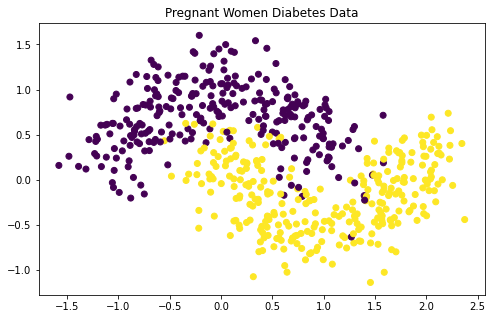

In [40]:
# plot datapoint distribution for both classes
# points are colored by class, Y_train
# 0 = purple, 1 = yellow

plt.figure(figsize=(8,5))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.title('Pregnant Women Diabetes Data')
plt.show()


In [27]:
# Get the datapoint splits using the counter function

from collections import Counter

Counter(y_train)

Counter({0: 375, 1: 201})

In [41]:
# Remove diabetes outcome target from features data
from sklearn.model_selection import train_test_split

y = diabetes_df.Outcome
X = diabetes_df.drop(columns="Outcome")

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


In [43]:
# Preprocess numerical data for neural network
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [44]:
# Instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression

log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
#y_pred is the same as predictor. Predictor seems more desctiptive = log_classifier.predict(X_test)
predictor = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,predictor):.3f}")

 Logistic regression model accuracy: 0.729


In [45]:
from sklearn.metrics import accuracy_score

print(f"accuracy_score: {accuracy_score(y_test, predictor): }")


from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, predictor)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

accuracy_score:  0.7291666666666666


In [46]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {accuracy_score}")
print("Classification Report")
print(classification_report(y_test, predictor))


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,105,20
Actual 1,32,35


Accuracy Score : <function accuracy_score at 0x0000017038E80948>
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       125
           1       0.64      0.52      0.57        67

    accuracy                           0.73       192
   macro avg       0.70      0.68      0.69       192
weighted avg       0.72      0.73      0.72       192



In [17]:
# Define the basic neural network model

# The keras model allow us to change hyper-parameters easily for optimization such as 
# Relu and Sigmoid.

nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=8))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
576/576 [==============================] - 0s 382us/sample - loss: 0.7053 - acc: 0.5764
Epoch 2/100
576/576 [==============================] - 0s 45us/sample - loss: 0.6743 - acc: 0.6181
Epoch 3/100
576/576 [==============================] - 0s 47us/sample - loss: 0.6471 - acc: 0.6458
Epoch 4/100
576/576 [==============================] - 0s 42us/sample - loss: 0.6221 - acc: 0.6667
Epoch 5/100
576/576 [==============================] - 0s 48us/sample - loss: 0.5996 - acc: 0.6736
Epoch 6/100
576/576 [==============================] - 0s 38us/sample - loss: 0.5805 - acc: 0.6910
Epoch 7/100
576/576 [==============================] - 0s 29us/sample - loss: 0.5629 - acc: 0.7014
Epoch 8/100
576/576 [==============================] - 0s 40us/sample - loss: 0.5483 - acc: 0.7135
Epoch 9/100
576/576 [==============================] - 0s 40us/sample - loss: 0.5350 - acc: 0.7309
Epoch 10/100
576/576 [==============================] - 0s 43us/sample - loss: 0.5238 - acc: 0.7378
Epoch 11

In [34]:
# Evaluate the Logistic Regression trained model on test data for model metrics

def evaluate(predictor, test_features, test_labels, verbose=True):
    """
    Evaluate a model on a test set given the prediction.  
    Return binary classification metrics.
    :param predictor: A prediction endpoint
    :param test_features: Test features
    :param test_labels: Class labels for test data
    :param verbose: If True, prints a table of all performance metrics
    :return: A dictionary of performance metrics.
    """
    
    # rounding and squeezing array
    test_preds = 0.01 #np.squeeze(np.round(predictor.predict(test_features)))
    
    # calculate true positives, false positives, true negatives, false negatives
    tp = np.logical_and(test_labels, test_preds).sum()
    fp = np.logical_and(1-test_labels, test_preds).sum()
    tn = np.logical_and(1-test_labels, 1-test_preds).sum()
    fn = np.logical_and(test_labels, 1-test_preds).sum()
    
    # calculate binary classification metrics
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    
    # print metrics
    if verbose:
        print(pd.crosstab(test_labels, test_preds, rownames=['Actuals'], colnames=['Predictions']))
        print("\n{:<11} {:.3f}".format('Recall:', recall))
        print("{:<11} {:.3f}".format('Precision:', precision))
        print("{:<11} {:.3f}".format('Accuracy:', accuracy))
        print()
        print("{:<11} {:.3f}".format('True Positive Rate(TP):', tp))
        print("{:<11} {:.3f}".format('False Positive Rate(FP):', fp))
        print("{:<11} {:.3f}".format('False Negative Rate(FN):', fn))
        print("{:<11} {:.3f}".format('True Negative Rate(TN):', tn))
        
    return {'TP': tp, 'FP': fp, 'FN': fn, 'TN': tn, 
            'Precision': precision, 'Recall': recall, 'Accuracy': accuracy}



In [36]:
# Display metrics evaluated

metrics = evaluate(predictor, X_test, y_test, True)

Predictions  0.01
Actuals          
0             125
1              67

Recall:     0.500
Precision:  0.349
Accuracy:   0.500

True Positive Rate(TP): 67.000
False Positive Rate(FP): 125.000
False Negative Rate(FN): 67.000
True Negative Rate(TN): 125.000
